In [3]:
# Prepare gpu for training
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

tf.config.list_physical_devices("GPU")

1 Physical GPUs, 1 Logical GPU


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# Preview model architecture

from scripts.model.build import get_architecture
from scripts.experiment import load_config

config = load_config("toy_model_mnist", "model")

gen_summary, disc_summary = get_architecture(config)

print(gen_summary)

print(disc_summary)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3136)              316736    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 re_lu (ReLU)                (None, 7, 7, 64)          0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 64)         256       
 ormalization)                                                   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

/home/chen/miniconda3/envs/tf/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


## Train

Loss for previous batch #135: Generator loss = 0.8599047064781189, Discriminator loss = 1.1629951000213623
Epoch # 1/1
Batch # 136
-0.9120108 -0.5824535 -0.9614252


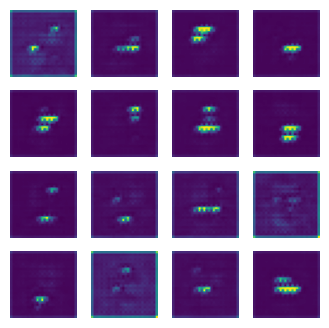

Time for epoch 1 is 24.77738094329834 sec


In [6]:
from scripts.experiment import run_experiment
generator, discriminator = run_experiment("mnist", "toy_model_mnist", "mnist_example", num_examples_to_generate=16, epochs=1, colab=False)